## Notebook para analise exploratória e estatistica dos dados de "Overview" extraidos do site VLR.GG

### Hipoteses:
- DAODS DE MAPAS
- DADOS DE MATCHES

In [3]:
## Import functions for Data Scraping, Treatment and Plotting

## System
import re
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

## EDA
import numpy as np
import pandas as pd

## Plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')


In [79]:
## FUNCIONS

## IMPORT DATA FROM CSV FILE
def ImportData(team_file):
    folder = team_file + '/'
    maps_file = team_file + '_overview_MAPS.csv'
    matches_file = team_file + '_overview_MATCHES.csv'
    
    maps = pd.read_csv(CSV_PATH + folder + maps_file)
    matches = pd.read_csv(CSV_PATH + folder + matches_file)

    return maps, matches

## ADD EXTRA INFO TO MATCHES DATAFRAME
def ExtraInfoMatches(df):
    # KDA + FK/FD per map
    df['KPM'] = round(df['K'] / df['Num_maps'],2)
    df['DPM'] = round(df['D'] / df['Num_maps'],2)
    df['APM'] = round(df['A'] / df['Num_maps'],2)
    df['FKPM'] = round(df['FK'] / df['Num_maps'],2)
    df['FDPM'] = round(df['FD'] / df['Num_maps'],2)

## ADD EXTRA INFO TO MAPS DATAFRAME
def ExtraInfoMaps(df):

    # Total Rounds
    df['total_rounds'] = df['rounds_won'] + df['rounds_lost']

    # Round Win Rate
    df['win_rate'] = round(df['rounds_won'] / df['total_rounds'] * 100, 2)

    # KDA + FK/FD per Round
    df['KPR'] = round(df['K'] / df['total_rounds'],2)
    df['DPR'] = round(df['D'] / df['total_rounds'],2)
    df['APR'] = round(df['A'] / df['total_rounds'],2)
    df['FKPR'] = round(df['FK'] / df['total_rounds'],2)
    df['FDPR'] = round(df['FD'] / df['total_rounds'],2)

    # Won/Lost Map
    df['RESULT'] = ['W' if x == True
                    else 'L'
                    for x in df['rounds_won'] > df['rounds_lost']]

## FILTER FUNCTIONS BY GIVEN OPPONENT/MAP/PLAYER/AGENT

def FilterTeam(df, teams):
    return df[df["Team"].isin(teams)].reset_index(drop=True)

def FilterOppTeam(df, opp_teams):
    return df[df["Opp_Team"].isin(opp_teams)].reset_index(drop=True)

def FilterMap(df, maps):
    return df[df["Map"].isin(maps)].reset_index(drop=True)

def FilterPlayer(df, players):
    return df[df["Player"].isin(players)].reset_index(drop=True)

def FilterAgent(df, agents):
    return df[df["Agents"].isin(agents)].reset_index(drop=True)

## CORRELATION OF GIVEN FEATURE WITH NUMBER OF ROUNDS WON
def WinCorr(stat, map = None):
    if map is not None:
        df = maps[maps["Map"] == map]
    corr_matrix = maps.groupby('rounds_won').mean()[stat].reset_index().corr()
    corr = corr_matrix['rounds_won'][stat]
    print("Correlação média({0}) por Rounds Vencidos: {1}".format(stat, round(corr,2)))

## CREATE DICT WITH MULTIPLE DATAFRAMES BY FILTERED VALUES
def FilterDict(col):
    aux = {}
    names = maps[col].unique()
    for name in names:
        aux[name] = maps[maps[col] == name].reset_index(drop=True)
    return aux

def Boxplot(nome_col, value):
    sns.set(rc={'figure.figsize':(12,7)})
    sns.boxplot(x=maps[nome_col], y=maps[value], order=maps[nome_col].sort_values().unique())

def Histogram(data ,value_col, filter):
    sns.set(rc={'figure.figsize':(12,7)})
    sns.displot(data=data, x=value_col, hue=filter)

def PlotAgentPickRate(df):
    for i, map in enumerate(MAPS):
        filter = FilterMap(df, [map])
        agent_pick_rate = filter['Agents'].value_counts() / (len(filter) / 5)  * 100
        plt.figure(i)
        sns.barplot(y=agent_pick_rate.index, x=agent_pick_rate.values, palette="Blues_d").set_title('Agent Pick Rate -- '+map+' -- Played: '+str(int(len(filter) / 5))+' times')

In [80]:
stats_cols = ['ACS'	,'K','D','A','KD_DIFF','ADR','HS%','FK','FD',	
              'FK_FD_DIFF', 'KPR', 'DPR', 'APR', 'FKPR',                  
              'FDPR', 'rounds_won', 'rounds_lost', 'total_rounds'] 

In [81]:
## TEAMS: ['GL', 'IMP', 'Mix', 'HAVAN', 'Inga', 'NMDM', 'VKS', 'FF', 'VORA', 'BD', 'paiN', 'NOOR']
CSV_PATH = '../data/csv/'
EXCEL_PATH = '..data/excel/'
TEAM = ['paiN', 'NOOR']
OPP_TEAMS = ['GL', 'IMP', 'HAVAN', 'Inga', 'NMDM', 'VKS', 'FF', 'VORA', 'BD']
MAPS = ['ASCENT', 'BIND', 'HAVEN', 'ICEBOX', 'SPLIT']

In [82]:
## team_files: gamlanders, pain, vorax, havan, imperial, ingaming, vikings, black_dragons
maps, matches = ImportData('pain')

## Add Extra Info
ExtraInfoMaps(maps)
ExtraInfoMatches(matches)

In [83]:
## Filter Team
matches = FilterTeam(matches, TEAM)
maps = FilterTeam(maps, TEAM)

In [84]:
#maps = FilterTeam(maps,)
#maps = FilterMap(maps,)
#maps = FilterPlayer(maps,)
#maps = FilterAgent(maps,)

In [85]:
print(matches.columns)
matches.head()

Index(['Player', 'ACS', 'K', 'D', 'A', 'KD_DIFF', 'ADR', 'HS%', 'FK', 'FD',
       'FK_FD_DIFF', 'Team', 'Opp_Team', 'Map', 'Num_maps', 'Patch', 'KPM',
       'DPM', 'APM', 'FKPM', 'FDPM'],
      dtype='object')


,Player,ACS,K,D,A,KD_DIFF,ADR,HS%,FK,FD,...,Team,Opp_Team,Map,Num_maps,Patch,KPM,DPM,APM,FKPM,FDPM
0,kon4n,244,52,35,23,17,161.6,25,5,2,...,paiN,IMP,MATCH,3,NaN,17.33,11.67,7.67,1.67,0.67
1,Txozin,244,57,43,6,14,145.3,32,7,3,...,paiN,IMP,MATCH,3,NaN,19.00,14.33,2.00,2.33,1.00
2,murizzz,211,37,49,23,-12,132.7,20,12,4,...,paiN,IMP,MATCH,3,NaN,12.33,16.33,7.67,4.00,1.33
3,Veroneze,183,39,44,11,-5,128.5,29,8,6,...,paiN,IMP,MATCH,3,NaN,13.00,14.67,3.67,2.67,2.00
4,matheuzin,160,37,43,4,-6,103.1,28,9,6,...,paiN,IMP,MATCH,3,NaN,12.33,14.33,1.33,3.00,2.00


In [86]:
print(maps.columns)
maps.head()

Index(['Player', 'Agents', 'ACS', 'K', 'D', 'A', 'KD_DIFF', 'ADR', 'HS%', 'FK',
       'FD', 'FK_FD_DIFF', 'Team', 'Opp_Team', 'rounds_won', 'rounds_lost',
       'Map', 'Patch', 'total_rounds', 'win_rate', 'KPR', 'DPR', 'APR', 'FKPR',
       'FDPR', 'RESULT'],
      dtype='object')


,Player,Agents,ACS,K,D,A,KD_DIFF,ADR,HS%,FK,...,Map,Patch,total_rounds,win_rate,KPR,DPR,APR,FKPR,FDPR,RESULT
0,kon4n,sage,330,21,8,7,13,180.9,19,3,...,ASCENT,NaN,18,72.22,1.17,0.44,0.39,0.17,0.00,W
1,murizzz,sova,246,14,11,10,3,135.7,12,4,...,ASCENT,NaN,18,72.22,0.78,0.61,0.56,0.22,0.00,W
2,Txozin,omen,237,17,11,2,6,139.1,28,1,...,ASCENT,NaN,18,72.22,0.94,0.61,0.11,0.06,0.06,W
3,Veroneze,jett,189,13,13,3,0,102.2,26,3,...,ASCENT,NaN,18,72.22,0.72,0.72,0.17,0.17,0.17,W
4,matheuzin,cypher,137,10,11,0,-1,88.0,35,2,...,ASCENT,NaN,18,72.22,0.56,0.61,0.00,0.11,0.06,W


In [33]:
player_dict = FilterDict('Player')
agent_dict = FilterDict('Agents')
map_dict = FilterDict('Map')

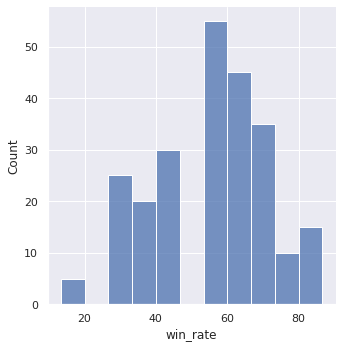

In [34]:
Histogram(maps, "win_rate", None)

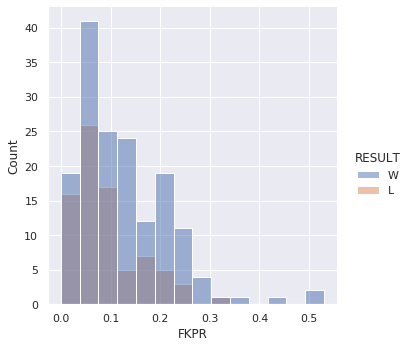

In [22]:
Histogram(maps, "FKPR", 'RESULT')

In [45]:
WinCorr('FKPR')

Correlação média(FKPR) por Rounds Vencidos: 0.93


In [46]:
WinCorr('FDPR')

Correlação média(FDPR) por Rounds Vencidos: -0.92


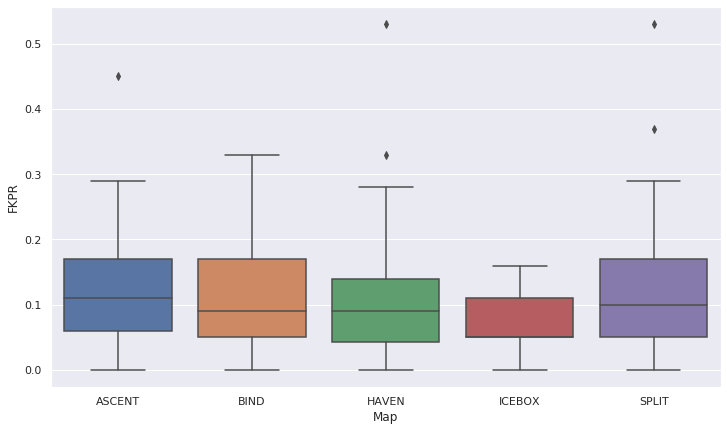

In [48]:
Boxplot('Map', 'FKPR')

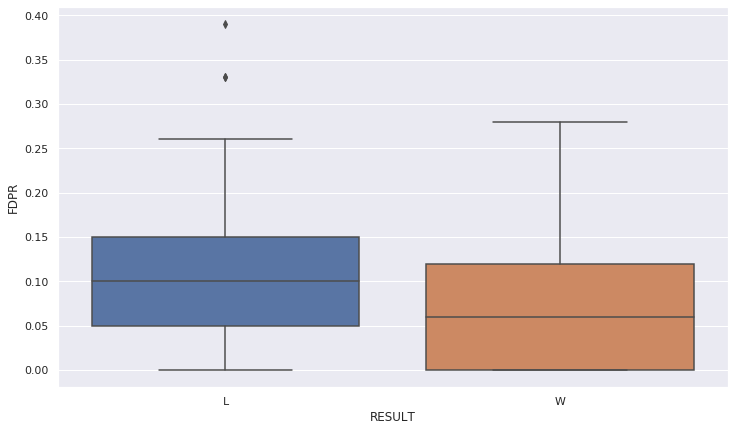

In [50]:
Boxplot('RESULT', 'FDPR')

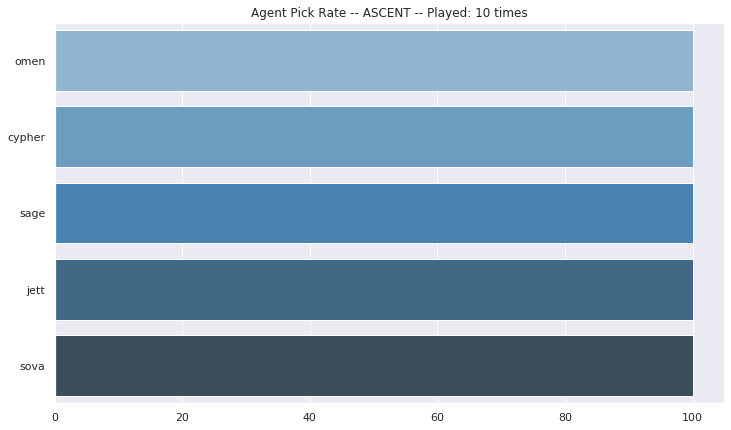

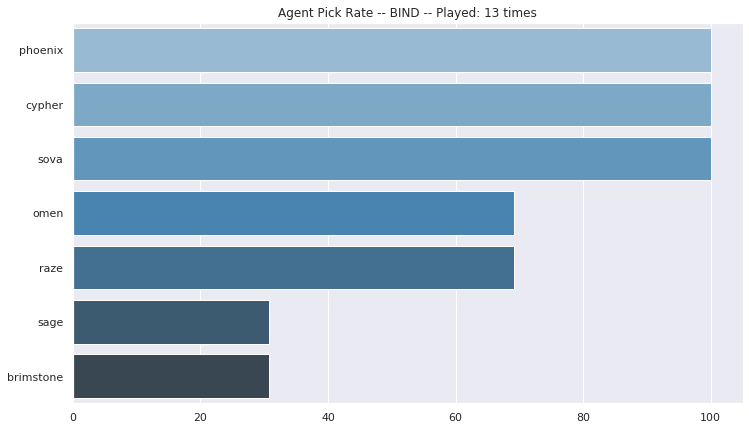

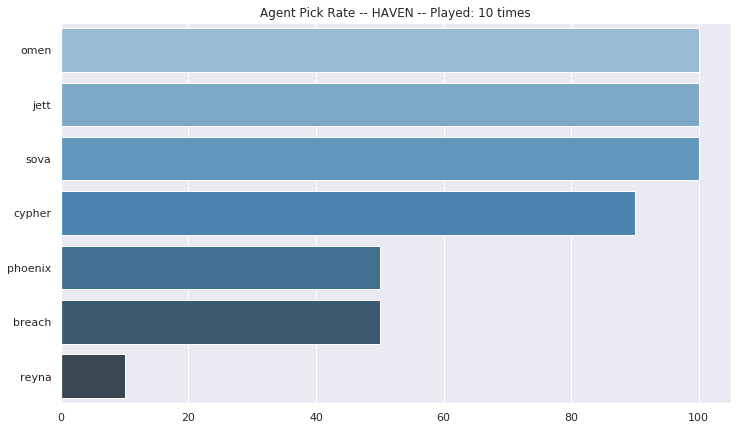

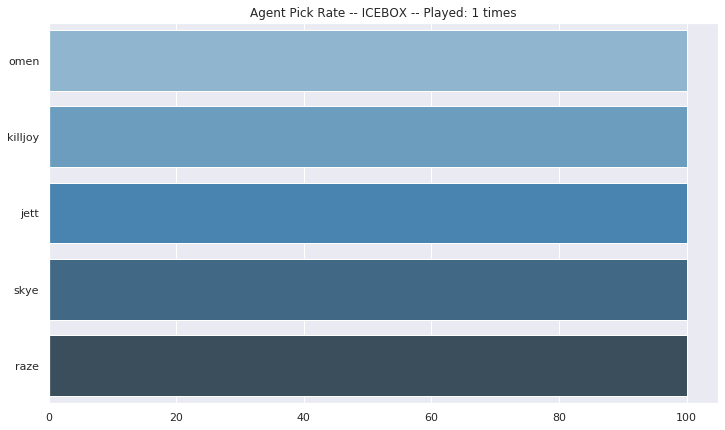

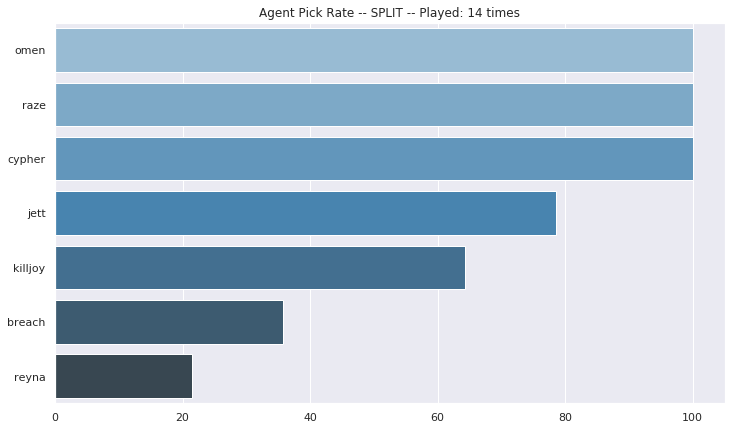

In [65]:
PlotAgentPickRate(maps)

In [85]:
## Proporcao de agentes utilizados por mapa



for map in MAPS:
    print('MAPA ' + map)
    print(map_dict[map]['Agents'].value_counts() / (len(map_dict[map]) / 5) * 100)
    print('--------')

MAPA ASCENT
jett      100.0
cypher    100.0
sage      100.0
omen      100.0
sova      100.0
Name: Agents, dtype: float64
--------
MAPA BIND
phoenix      100.000000
cypher       100.000000
sova         100.000000
raze          69.230769
omen          69.230769
brimstone     30.769231
sage          30.769231
Name: Agents, dtype: float64
--------
MAPA HAVEN
jett       100.0
sova       100.0
omen       100.0
cypher      90.0
phoenix     50.0
breach      50.0
reyna       10.0
Name: Agents, dtype: float64
--------
MAPA ICEBOX
killjoy    100.0
skye       100.0
raze       100.0
jett       100.0
omen       100.0
Name: Agents, dtype: float64
--------
MAPA SPLIT
cypher     100.000000
raze       100.000000
omen       100.000000
jett        78.571429
killjoy     64.285714
breach      35.714286
reyna       21.428571
Name: Agents, dtype: float64
--------
